## AllLife Credit Card Customer Segmentation

**Background**: AllLife Bank wants to focus on its credit card customer base in the next
financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Based on this input, the Marketing team
proposes to run personalised campaigns to target new customers as well as upsell to
existing customers. Another insight from the market research was that the customers
perceive the support services of the back poorly. Based on this, the Operations team
wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the
Data Science team for help.

**Objective**: To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank.

**Key Questions**:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

**Data Description**:
* Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

**Data Dictionary**:

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_excel("Credit Card Customer Data.xlsx")

<IPython.core.display.Javascript object>

In [3]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [4]:
# checking shape of the dataframe
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# checking 10 random sample data
np.random.seed(1)
df.sample(n=10)

There are 660 rows and 7 columns.


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


<IPython.core.display.Javascript object>

In [5]:
# dropping the serial no. column as it does not provide any information
df.drop("Sl_No", axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Checking data types of the columns in the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


<IPython.core.display.Javascript object>

All columns has **int** data type

In [7]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

No duplicate row found in the dataframe

#### Checking for no. of missing values in the columns

In [8]:
df.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

No missing value found

In [9]:
df.nunique()  # number of unique values in each columns

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<IPython.core.display.Javascript object>

Looks like 'Customer Key' has duplicates value.

In [10]:
df[df.duplicated(["Customer Key"], keep=False)].sort_values("Customer Key")

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

In [11]:
df["Customer Key"] = df["Customer Key"].astype(
    "category", copy=False
)  # changing 'Customer Key' to categorial variable

<IPython.core.display.Javascript object>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Customer Key         660 non-null    category
 1   Avg_Credit_Limit     660 non-null    int64   
 2   Total_Credit_Cards   660 non-null    int64   
 3   Total_visits_bank    660 non-null    int64   
 4   Total_visits_online  660 non-null    int64   
 5   Total_calls_made     660 non-null    int64   
dtypes: category(1), int64(5)
memory usage: 48.5 KB


<IPython.core.display.Javascript object>

#### Summary of the dataset.

In [13]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


<IPython.core.display.Javascript object>

* `Avg_Credit_Limit`:  Average is 34574, Credit Limit of customers range from 3000 to 200000.
* `Total_Credit_Cards`: Average is 4.7, Credit Cards count range from 1 to 10.
* `Total_visits_bank`: Average is 2.4, Visits bank count range from 0 to 5.
* `Total_visits_online`: Average is 2.6, Visits online count range from 0 to 15.
* `Total_calls_made`: Average is 3.6, Credit Cards count range from 0 to 10.

# EDA

### Univariate Analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

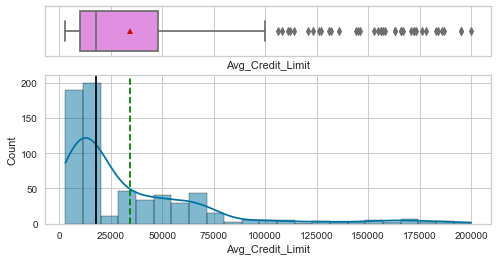

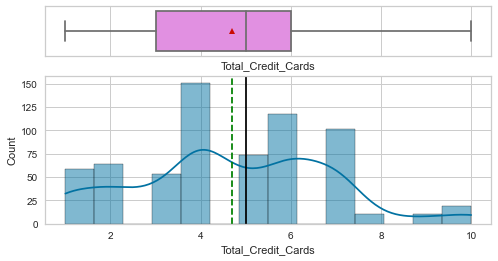

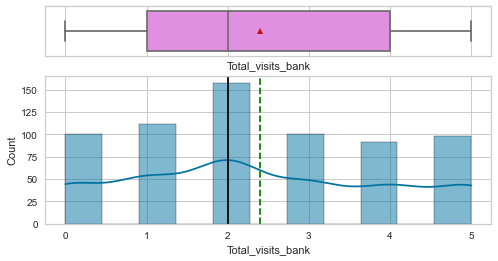

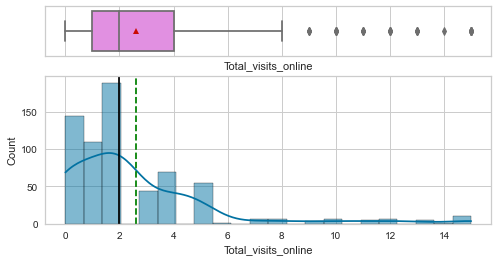

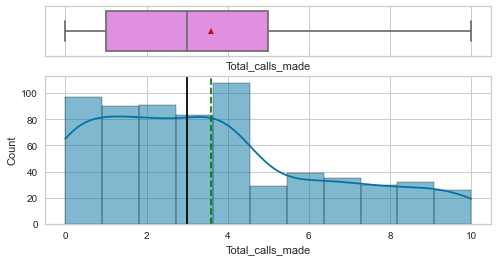

<IPython.core.display.Javascript object>

In [15]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, kde=True, figsize=(8, 4))

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

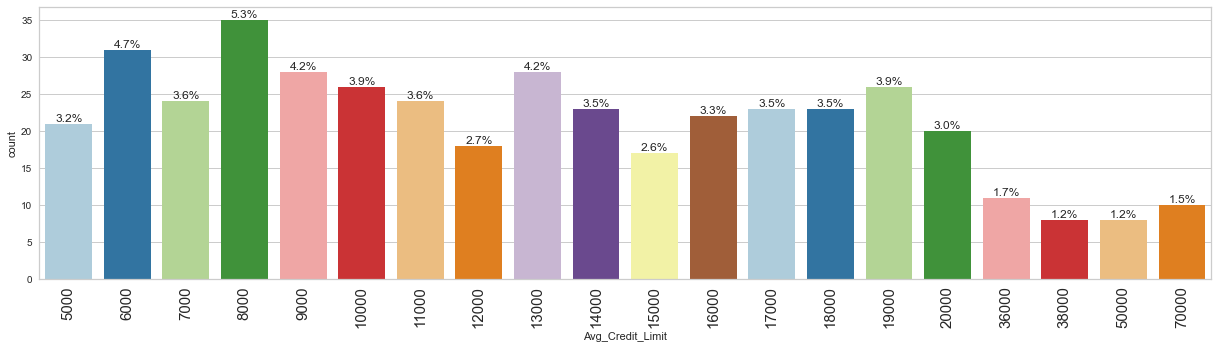

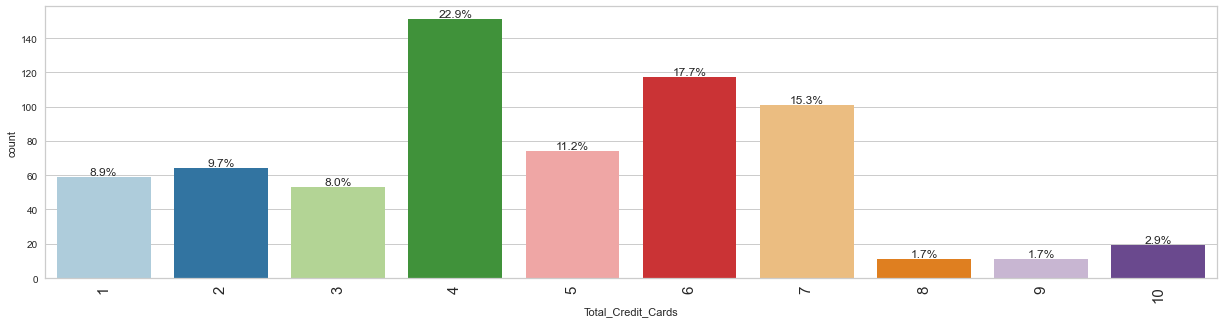

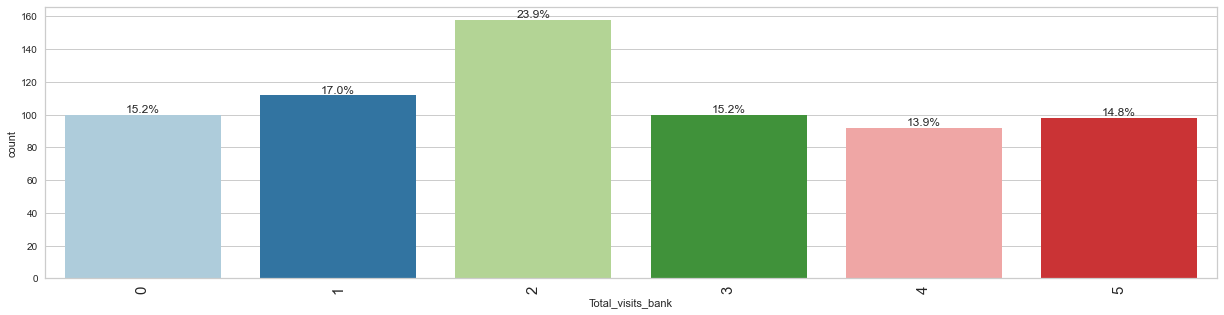

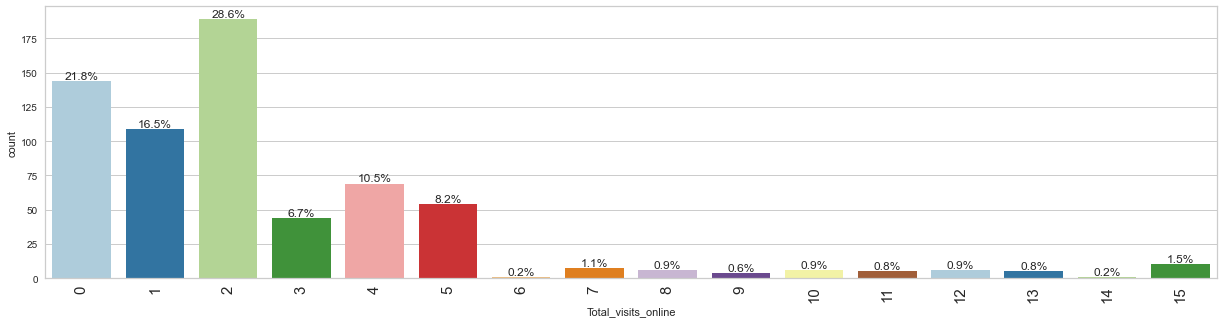

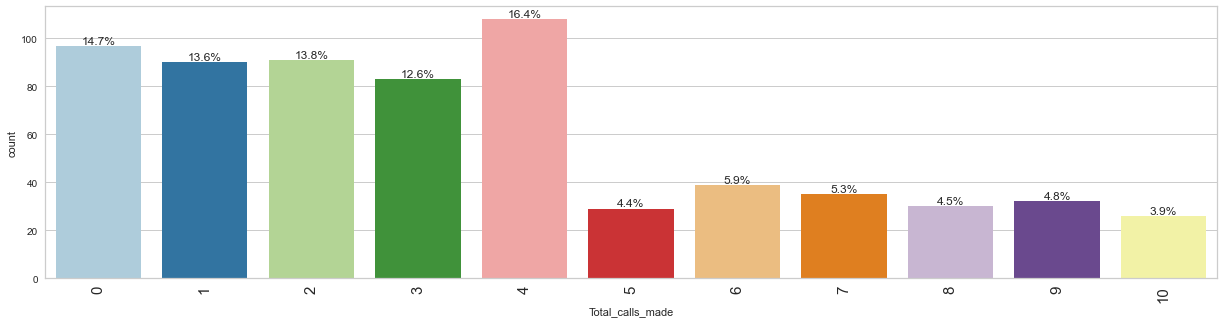

<IPython.core.display.Javascript object>

In [17]:
for item in num_col:
    labeled_barplot(df, item, perc=True, n=20)

* The distribution of **Credit Limit** is heavily right-skewed with a median is 18000. Also has lots of outlier.
* **Credit Cards** are well distributed. Maximum customers has 4 cards.
* **Visits Bank** are well distributed. Maximum customers visited bank 2 times.
* **Visits Online** is heavily right-skewed with a median is 2. Maximum customers visited online 2 times. Also has some outlier.
* **Calls Made** is right-skewed with a median is 3. Maximum customers calls made 4 times.

### Bivariate Analsysis

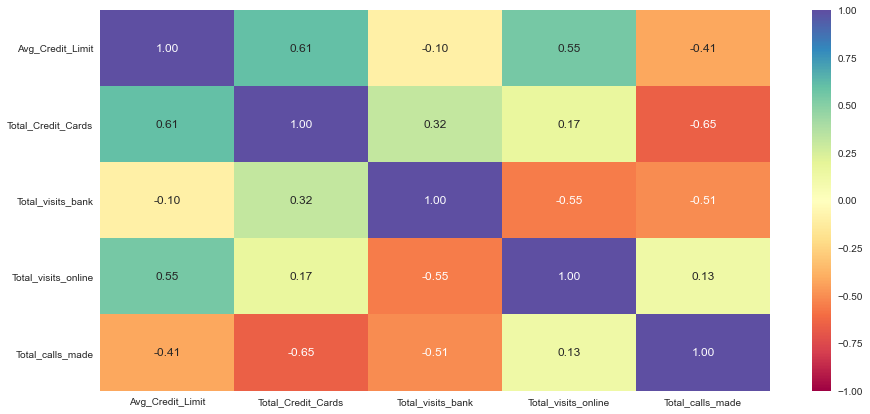

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* **Avg_Credit_Limit** has positive correlation with **Total_Credit_Cards** and **Total_visits_online**.
* **Total_Credit_Cards** has negative correlation with **Total_calls_made**.
* **Total_visits_bank** has negative correlation with **Total_visits_online** and **Total_calls_made**.

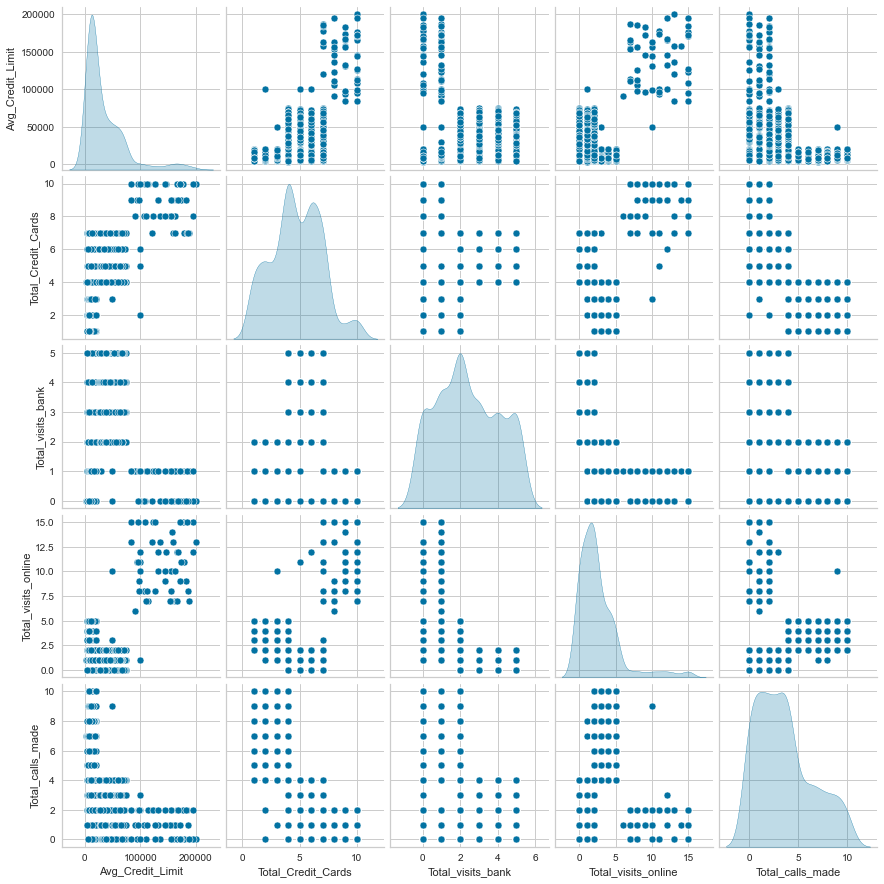

<IPython.core.display.Javascript object>

In [19]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

In [20]:
### function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    axs[0, 0].set_title("Distribution of " + predictor)
    sns.histplot(
        data=data, x=predictor, kde=True, ax=axs[0, 0], color="teal", stat="density",
    )

    axs[0, 1].set_title("Distribution of " + target)
    sns.histplot(
        data=data, x=target, kde=True, ax=axs[0, 1], color="orange", stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

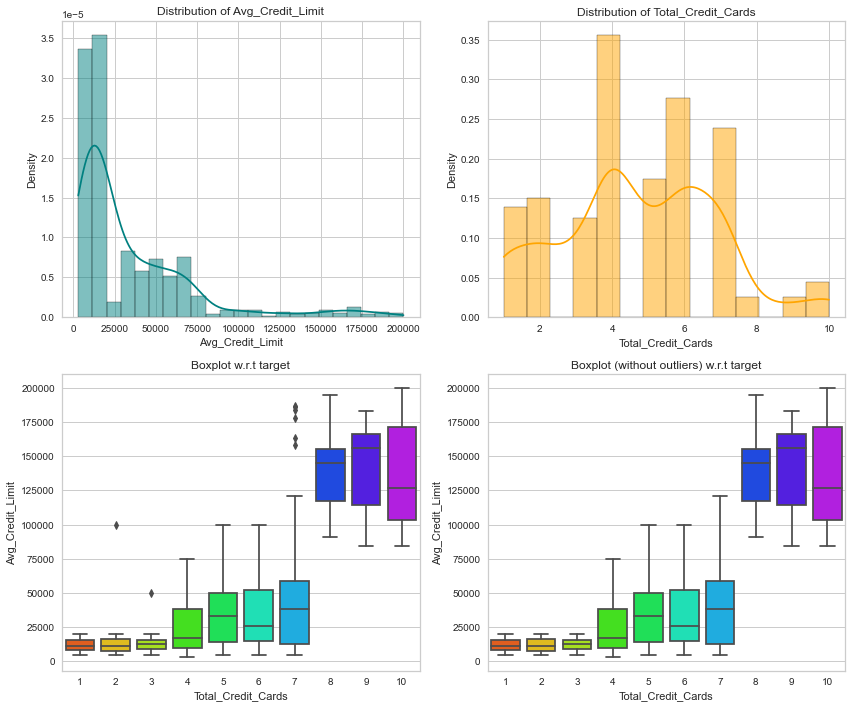

<IPython.core.display.Javascript object>

In [21]:
distribution_plot_wrt_target(df, "Avg_Credit_Limit", "Total_Credit_Cards")

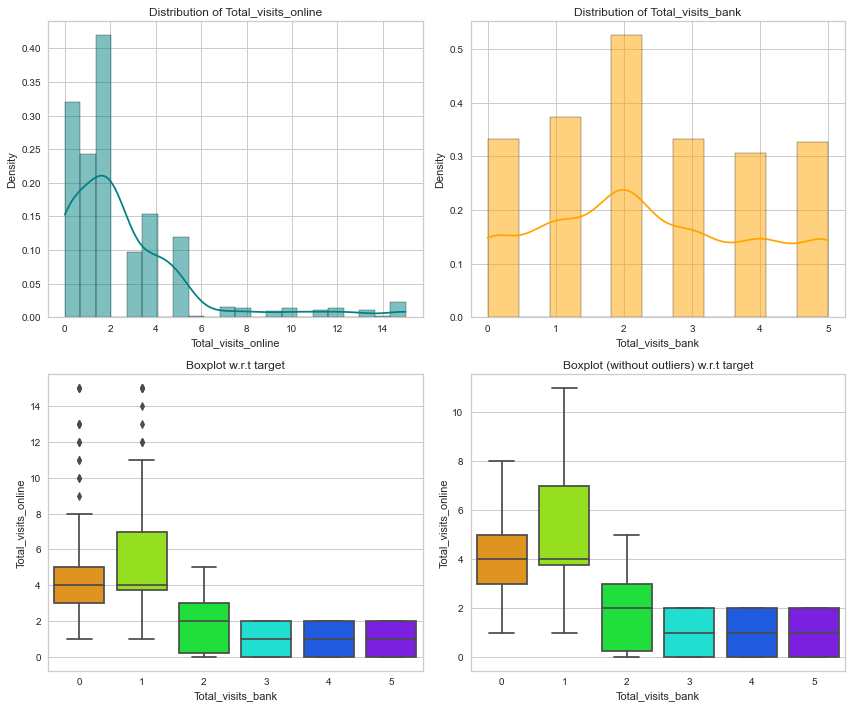

<IPython.core.display.Javascript object>

In [22]:
distribution_plot_wrt_target(df, "Total_visits_online", "Total_visits_bank")

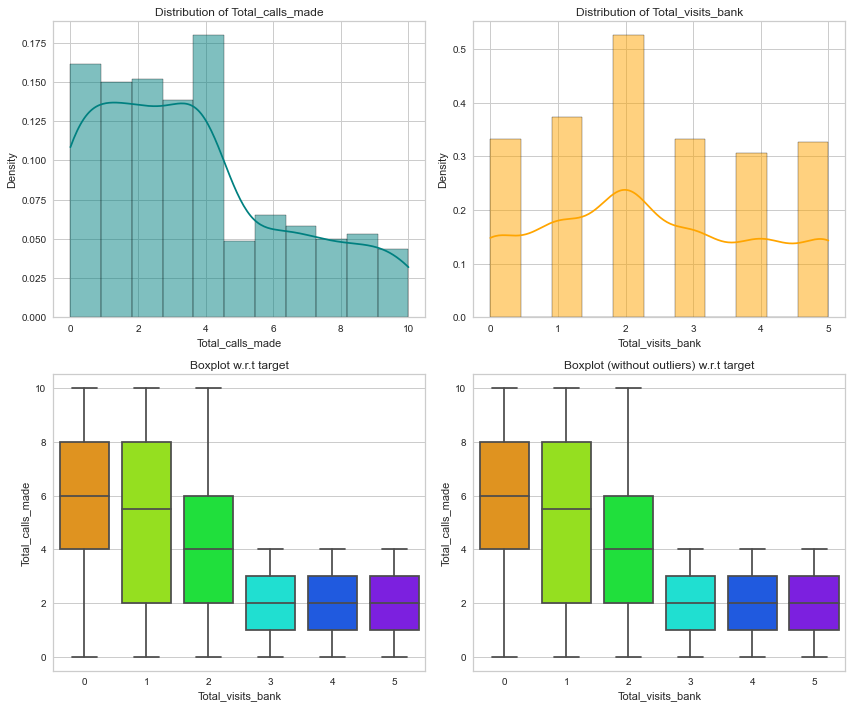

<IPython.core.display.Javascript object>

In [23]:
distribution_plot_wrt_target(df, "Total_calls_made", "Total_visits_bank")

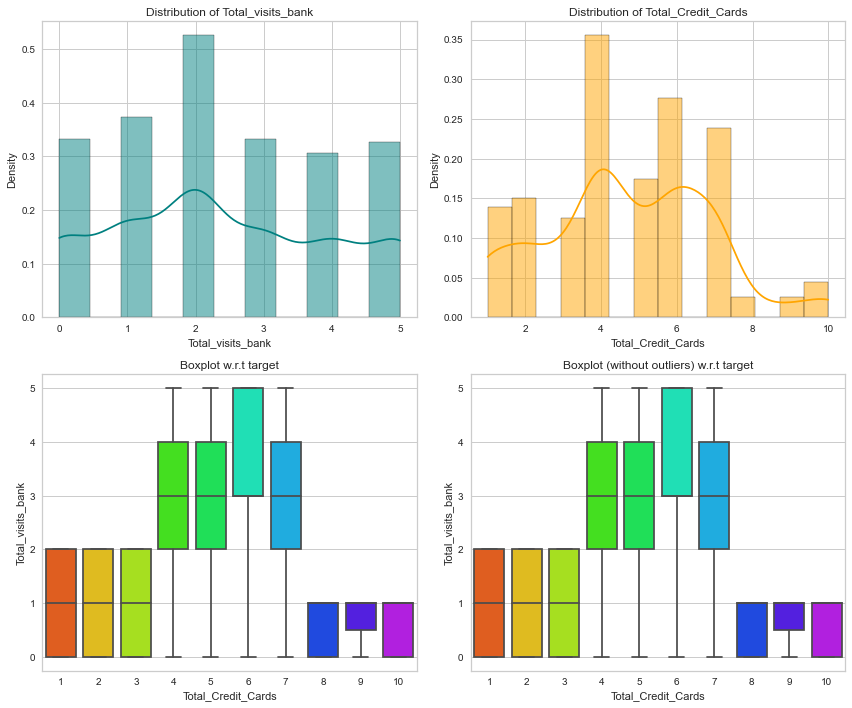

<IPython.core.display.Javascript object>

In [24]:
distribution_plot_wrt_target(df, "Total_visits_bank", "Total_Credit_Cards")

## K-means

In [25]:
num_col  # numeric columns

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

<IPython.core.display.Javascript object>

In [26]:
df_km = df.copy()

# Scaling the data set before clustering
scaler = StandardScaler()
subset_km = df_km[num_col].copy()
subset_scaled_km = scaler.fit_transform(subset_km)

<IPython.core.display.Javascript object>

In [27]:
# Creating a dataframe from the scaled data
subset_scaled_df_km = pd.DataFrame(subset_scaled_km, columns=subset_km.columns)

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.990772333470802
Number of Clusters: 6 	Average Distortion: 0.9430843103448057
Number of Clusters: 7 	Average Distortion: 0.9094290022428964
Number of Clusters: 8 	Average Distortion: 0.8891380888508975
Number of Clusters: 9 	Average Distortion: 0.8662110154172262
Number of Clusters: 10 	Average Distortion: 0.8454583848004075
Number of Clusters: 11 	Average Distortion: 0.8172564407889283
Number of Clusters: 12 	Average Distortion: 0.8050713056401926
Number of Clusters: 13 	Average Distortion: 0.7841613197903131
Number of Clusters: 14 	Average Distortion: 0.7639142623095087


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

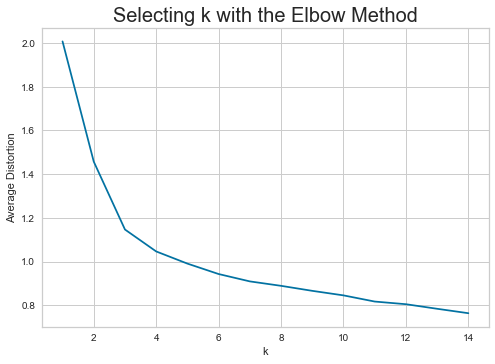

<IPython.core.display.Javascript object>

In [28]:
clusters_km = range(1, 15)
meanDistortions_km = []

for k in clusters_km:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df_km)
    prediction = model.predict(subset_scaled_df_km)
    distortion = (
        sum(
            np.min(
                cdist(subset_scaled_df_km, model.cluster_centers_, "euclidean"), axis=1
            )
        )
        / subset_scaled_df_km.shape[0]
    )

    meanDistortions_km.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters_km, meanDistortions_km, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**The appropriate value of k from the elbow curve seems to be 3 or 4.**

**Let's check the silhouette scores.**

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2726698397729061
For n_clusters = 6, silhouette score is 0.2559343318377826
For n_clusters = 7, silhouette score is 0.248175083050816
For n_clusters = 8, silhouette score is 0.228992511850664
For n_clusters = 9, silhouette score is 0.2185834255939503
For n_clusters = 10, silhouette score is 0.20849619354503074
For n_clusters = 11, silhouette score is 0.21623219553796194
For n_clusters = 12, silhouette score is 0.2058812720229218
For n_clusters = 13, silhouette score is 0.22044378257115693
For n_clusters = 14, silhouette score is 0.2248093055272317


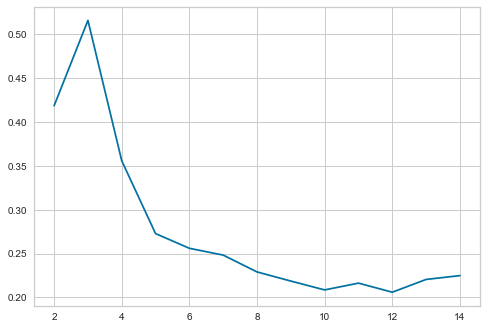

<IPython.core.display.Javascript object>

In [29]:
sil_score_km = []
cluster_list_km = list(range(2, 15))
for n_clusters in cluster_list_km:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df_km))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df_km, preds)
    sil_score_km.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list_km, sil_score_km)

**From the silhouette scores, it seems that 3 is a good value of k.**

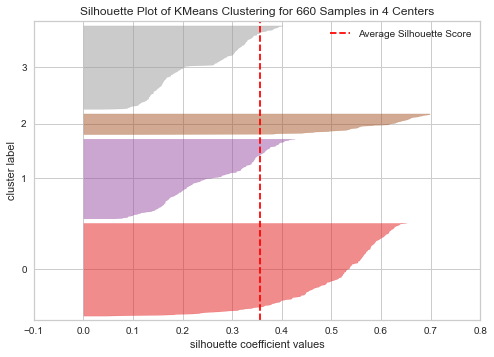

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [30]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df_km)
visualizer.show()

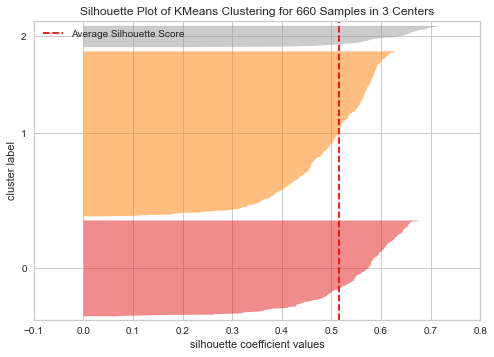

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [31]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df_km)
visualizer.show()

In [32]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(subset_scaled_df_km)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [33]:
# adding kmeans cluster labels to the original dataframe
df_km["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [34]:
cluster_profile_km = df_km.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [35]:
cluster_profile_km["count_in_each_segment"] = (
    df_km.groupby("K_means_segments")["Customer Key"].count().values
)

<IPython.core.display.Javascript object>

In [36]:
# let's display cluster profiles
cluster_profile_km.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

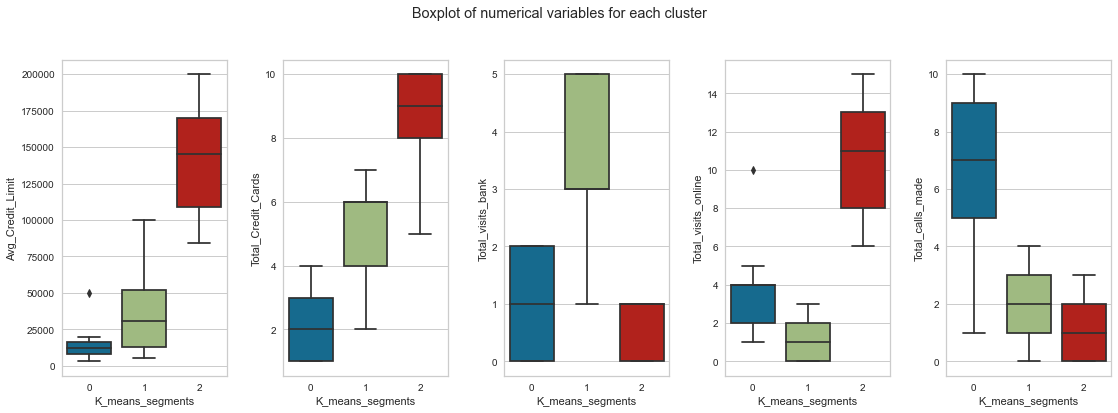

<IPython.core.display.Javascript object>

In [37]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df_km["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

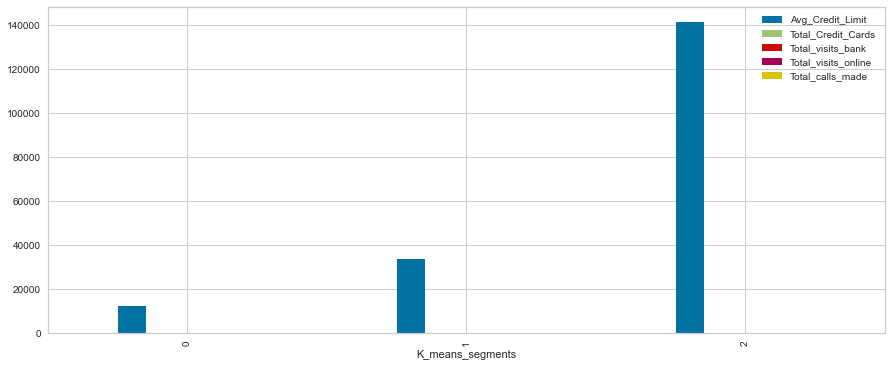

<IPython.core.display.Javascript object>

In [38]:
df_km.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

## Hierarchical Clustering and PCA

In [39]:
# copying the data to another variable to avoid any changes to original data
df_HC_PCA = df.copy()
sc = StandardScaler()
subset_scaled_df_hc = pd.DataFrame(
    sc.fit_transform(df_HC_PCA.drop(["Customer Key"], axis=1)),
    columns=df_HC_PCA.drop(["Customer Key"], axis=1).columns,
)
subset_scaled_df_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


<IPython.core.display.Javascript object>

In [40]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df_hc, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df_hc))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

<IPython.core.display.Javascript object>

In [41]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [42]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df_hc, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df_hc))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


<IPython.core.display.Javascript object>

In [43]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


<IPython.core.display.Javascript object>

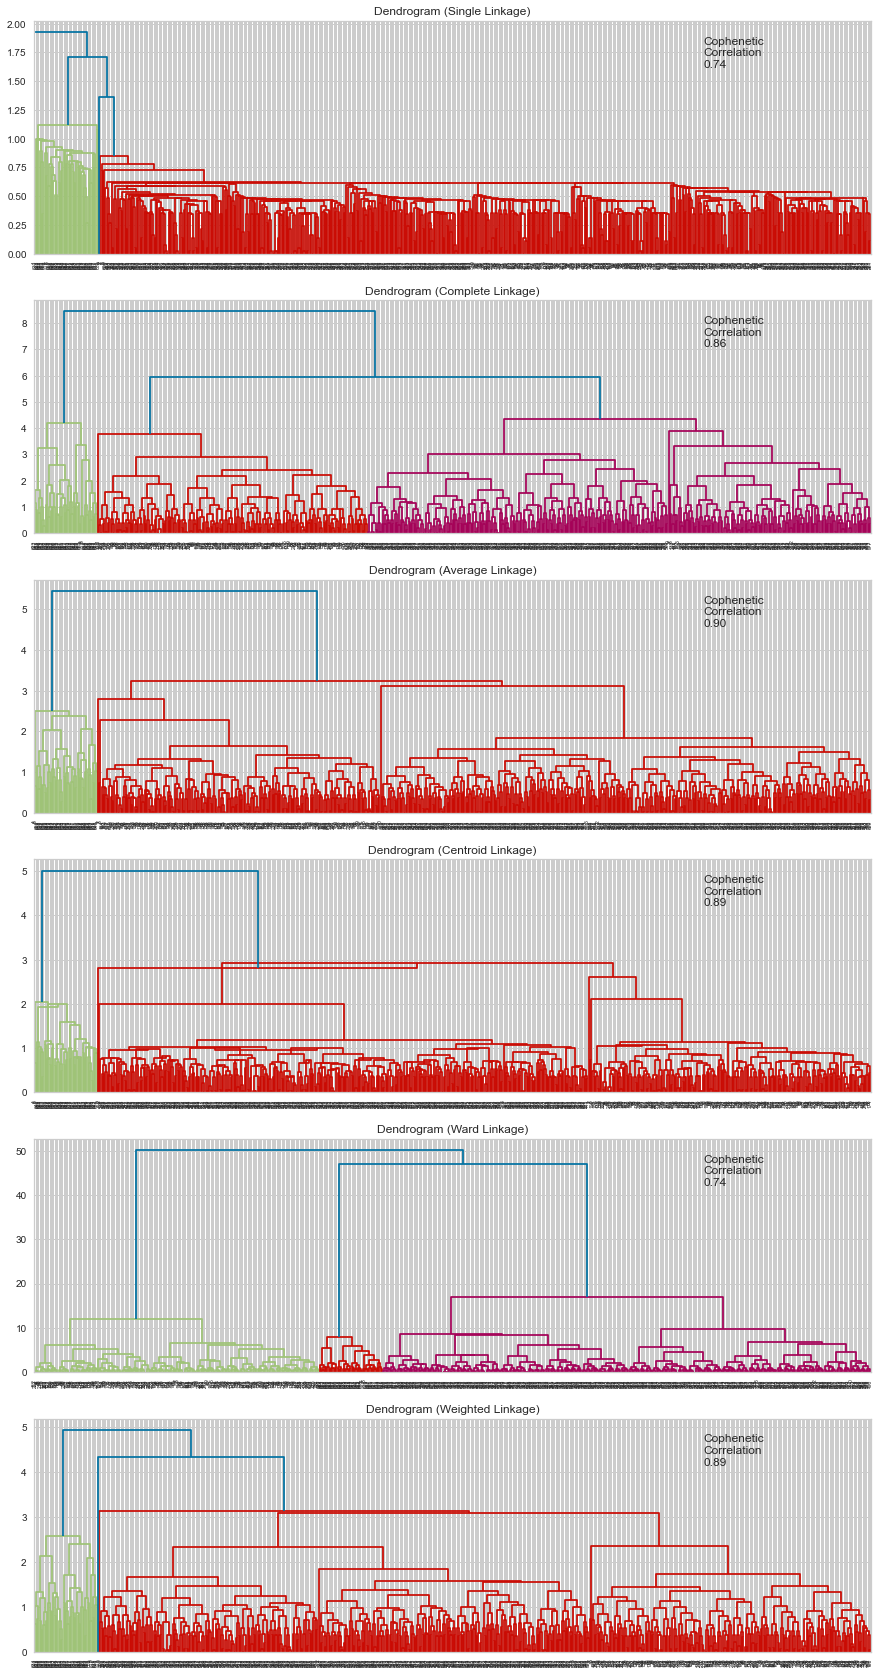

<IPython.core.display.Javascript object>

In [44]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df_hc, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df_hc))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

##### **Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 5 appears to be the appropriate number of clusters from the dendrogram for average linkage.

**Let's check the silhouette scores.**

For n_clusters = 2, silhouette score is 0.5703183487340514
For n_clusters = 3, silhouette score is 0.515922432650965
For n_clusters = 4, silhouette score is 0.47495143595793504
For n_clusters = 5, silhouette score is 0.44039753024783956
For n_clusters = 6, silhouette score is 0.4153547954831452
For n_clusters = 7, silhouette score is 0.4183775674672025
For n_clusters = 8, silhouette score is 0.34306710358280806
For n_clusters = 9, silhouette score is 0.3415486932890892
For n_clusters = 10, silhouette score is 0.34550947121387965
For n_clusters = 11, silhouette score is 0.2447291218167871
For n_clusters = 12, silhouette score is 0.24365266659372634
For n_clusters = 13, silhouette score is 0.21275655571931731
For n_clusters = 14, silhouette score is 0.1919801977019437


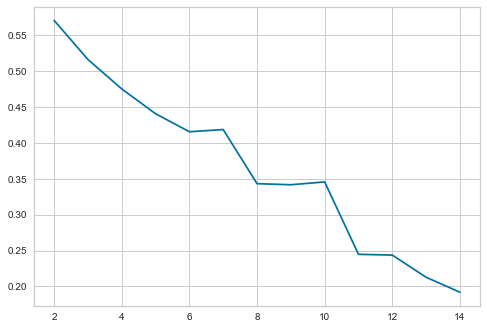

<IPython.core.display.Javascript object>

In [45]:
sil_score_hc = []
cluster_list_hc = list(range(2, 15))
for n_clusters in cluster_list_hc:
    clusterer = AgglomerativeClustering(
        n_clusters=n_clusters, affinity="euclidean", linkage="average"
    )
    preds = clusterer.fit_predict((subset_scaled_df_hc))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df_hc, preds)
    sil_score_hc.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list_hc, sil_score_hc)

**From the silhouette scores, it seems that 2 is a good value of k.**

**Let us try using Average linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Average linkage.**

In [46]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df_hc)

AgglomerativeClustering(linkage='average', n_clusters=6)

<IPython.core.display.Javascript object>

In [47]:
subset_scaled_df_hc["HC_Clusters"] = HCmodel.labels_
df_HC_PCA["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [48]:
cluster_profile_hc = df_HC_PCA.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [49]:
cluster_profile_hc["count_in_each_segments"] = (
    df_HC_PCA.groupby("HC_Clusters")["Customer Key"].count().values
)

<IPython.core.display.Javascript object>

In [50]:
# let's see the names of the countries in each cluster
for cl in df_HC_PCA["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df_HC_PCA[df_HC_PCA["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 3, the following countries are present:
[87073]
Categories (1, int64): [87073]

In cluster 4, the following countries are present:
[38414]
Categories (1, int64): [38414]

In cluster 2, the following countries are present:
[17341, 40496, 54838, 35254, 46635, ..., 90191, 49341, 11562, 16253, 80623]
Length: 384
Categories (384, int64): [17341, 40496, 54838, 35254, ..., 49341, 11562, 16253, 80623]

In cluster 5, the following countries are present:
[47437, 48370]
Categories (2, int64): [47437, 48370]

In cluster 1, the following countries are present:
[58634, 37376, 82490, 44770, 52741, ..., 51773, 96163, 61234, 55849, 56156]
Length: 222
Categories (222, int64): [58634, 37376, 82490, 44770, ..., 96163, 61234, 55849, 56156]

In cluster 0, the following countries are present:
[94391, 50598, 40019, 77910, 89832, ..., 51108, 60732, 53834, 80655, 80150]
Length: 48
Categories (48, int64): [94391, 50598, 40019, 77910, ..., 60732, 53834, 80655, 80150]



<IPython.core.display.Javascript object>

In [51]:
# lets display cluster profile
cluster_profile_hc.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,142750.000000,8.875000,0.625000,10.875000,1.020833,48
1,12027.027027,2.400901,0.932432,3.531532,6.873874,222
2,33541.450777,5.520725,3.492228,0.984456,2.010363,386
3,100000.000000,2.000000,1.000000,1.000000,0.000000,1
4,50000.000000,3.000000,0.000000,10.000000,9.000000,1
5,100000.000000,5.500000,0.000000,11.500000,2.500000,2


<IPython.core.display.Javascript object>

**Let us try using 5 cluster**

In [52]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df_hc)

AgglomerativeClustering(linkage='average', n_clusters=5)

<IPython.core.display.Javascript object>

In [53]:
subset_scaled_df_hc["HC_Clusters"] = HCmodel.labels_
df_HC_PCA["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [54]:
cluster_profile_hc = df_HC_PCA.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [55]:
cluster_profile_hc["count_in_each_segments"] = (
    df_HC_PCA.groupby("HC_Clusters")["Customer Key"].count().values
)

<IPython.core.display.Javascript object>

In [56]:
# let's see the names of the countries in each cluster
for cl in df_HC_PCA["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df_HC_PCA[df_HC_PCA["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 4, the following countries are present:
[87073]
Categories (1, int64): [87073]

In cluster 0, the following countries are present:
[38414, 47437, 48370]
Categories (3, int64): [38414, 47437, 48370]

In cluster 2, the following countries are present:
[17341, 40496, 54838, 35254, 46635, ..., 90191, 49341, 11562, 16253, 80623]
Length: 384
Categories (384, int64): [17341, 40496, 54838, 35254, ..., 49341, 11562, 16253, 80623]

In cluster 3, the following countries are present:
[58634, 37376, 82490, 44770, 52741, ..., 51773, 96163, 61234, 55849, 56156]
Length: 222
Categories (222, int64): [58634, 37376, 82490, 44770, ..., 96163, 61234, 55849, 56156]

In cluster 1, the following countries are present:
[94391, 50598, 40019, 77910, 89832, ..., 51108, 60732, 53834, 80655, 80150]
Length: 48
Categories (48, int64): [94391, 50598, 40019, 77910, ..., 60732, 53834, 80655, 80150]



<IPython.core.display.Javascript object>

In [57]:
# lets display cluster profile
cluster_profile_hc.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,83333.333333,4.666667,0.000000,11.000000,4.666667,3
1,142750.000000,8.875000,0.625000,10.875000,1.020833,48
2,33541.450777,5.520725,3.492228,0.984456,2.010363,386
3,12027.027027,2.400901,0.932432,3.531532,6.873874,222
4,100000.000000,2.000000,1.000000,1.000000,0.000000,1


<IPython.core.display.Javascript object>

**Let us try using 4 cluster**

In [58]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df_hc)

AgglomerativeClustering(linkage='average', n_clusters=4)

<IPython.core.display.Javascript object>

In [59]:
subset_scaled_df_hc["HC_Clusters"] = HCmodel.labels_
df_HC_PCA["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [60]:
cluster_profile_hc = df_HC_PCA.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [61]:
cluster_profile_hc["count_in_each_segments"] = (
    df_HC_PCA.groupby("HC_Clusters")["Customer Key"].count().values
)

<IPython.core.display.Javascript object>

In [62]:
# let's see the names of the countries in each cluster
for cl in df_HC_PCA["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df_HC_PCA[df_HC_PCA["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 3, the following countries are present:
[87073]
Categories (1, int64): [87073]

In cluster 2, the following countries are present:
[38414]
Categories (1, int64): [38414]

In cluster 0, the following countries are present:
[17341, 40496, 58634, 37376, 82490, ..., 90191, 49341, 11562, 16253, 80623]
Length: 605
Categories (605, int64): [17341, 40496, 58634, 37376, ..., 49341, 11562, 16253, 80623]

In cluster 1, the following countries are present:
[47437, 48370, 94391, 50598, 40019, ..., 51108, 60732, 53834, 80655, 80150]
Length: 50
Categories (50, int64): [47437, 48370, 94391, 50598, ..., 60732, 53834, 80655, 80150]



<IPython.core.display.Javascript object>

In [63]:
# lets display cluster profile
cluster_profile_hc.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,25685.855263,4.381579,2.557566,1.914474,3.786184,608
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,50000.000000,3.000000,0.000000,10.000000,9.000000,1
3,100000.000000,2.000000,1.000000,1.000000,0.000000,1


<IPython.core.display.Javascript object>

**Let us try using 3 cluster**

In [64]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df_hc)

AgglomerativeClustering(linkage='average', n_clusters=3)

<IPython.core.display.Javascript object>

In [65]:
subset_scaled_df_hc["HC_Clusters"] = HCmodel.labels_
df_HC_PCA["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [66]:
cluster_profile_hc = df_HC_PCA.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [67]:
cluster_profile_hc["count_in_each_segments"] = (
    df_HC_PCA.groupby("HC_Clusters")["Customer Key"].count().values
)

<IPython.core.display.Javascript object>

In [68]:
# let's see the names of the countries in each cluster
for cl in df_HC_PCA["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df_HC_PCA[df_HC_PCA["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 0, the following countries are present:
[87073, 17341, 40496, 58634, 37376, ..., 90191, 49341, 11562, 16253, 80623]
Length: 606
Categories (606, int64): [87073, 17341, 40496, 58634, ..., 49341, 11562, 16253, 80623]

In cluster 2, the following countries are present:
[38414]
Categories (1, int64): [38414]

In cluster 1, the following countries are present:
[47437, 48370, 94391, 50598, 40019, ..., 51108, 60732, 53834, 80655, 80150]
Length: 50
Categories (50, int64): [47437, 48370, 94391, 50598, ..., 60732, 53834, 80655, 80150]



<IPython.core.display.Javascript object>

In [69]:
# lets display cluster profile
cluster_profile_hc.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,25807.881773,4.377668,2.555008,1.912972,3.779967,609
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,50000.000000,3.000000,0.000000,10.000000,9.000000,1


<IPython.core.display.Javascript object>

**Let us try using 2 cluster**

In [70]:
HCmodel = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df_hc)

AgglomerativeClustering(linkage='average')

<IPython.core.display.Javascript object>

In [71]:
subset_scaled_df_hc["HC_Clusters"] = HCmodel.labels_
df_HC_PCA["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [72]:
cluster_profile_hc = df_HC_PCA.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [73]:
cluster_profile_hc["count_in_each_segments"] = (
    df_HC_PCA.groupby("HC_Clusters")["Customer Key"].count().values
)

<IPython.core.display.Javascript object>

In [74]:
# let's see the names of the countries in each cluster
for cl in df_HC_PCA["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df_HC_PCA[df_HC_PCA["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 0, the following countries are present:
[87073, 38414, 17341, 40496, 58634, ..., 90191, 49341, 11562, 16253, 80623]
Length: 607
Categories (607, int64): [87073, 38414, 17341, 40496, ..., 49341, 11562, 16253, 80623]

In cluster 1, the following countries are present:
[47437, 48370, 94391, 50598, 40019, ..., 51108, 60732, 53834, 80655, 80150]
Length: 50
Categories (50, int64): [47437, 48370, 94391, 50598, ..., 60732, 53834, 80655, 80150]



<IPython.core.display.Javascript object>

In [75]:
# lets display cluster profile
cluster_profile_hc.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,25847.540984,4.375410,2.550820,1.926230,3.788525,610
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

**Looks like cluster 2 is good for this model**

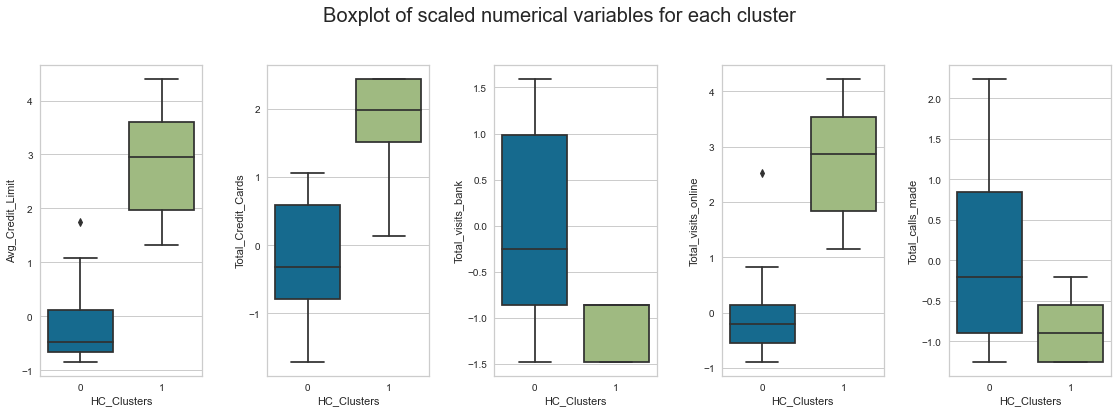

<IPython.core.display.Javascript object>

In [76]:
# selecting numerical columns
num_cols = df_HC_PCA.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df_hc[num_cols[counter]],
        x=subset_scaled_df_hc["HC_Clusters"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

* There are 2 diffrent segment
* Higher Credit card has more Card limit and more online

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [77]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(df_HC_PCA)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

<IPython.core.display.Javascript object>

In [78]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.9999999911258441

<IPython.core.display.Javascript object>

- The first two principal components explain 99.9% of the variance in the data.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

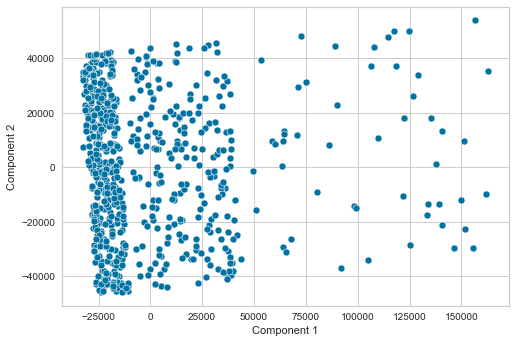

<IPython.core.display.Javascript object>

In [79]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

- We can kind of see two broad clusters if we draw a horizontal line around y=1.
- There a few outlier points too.

Let's colour the scatterplot by cluster labels.

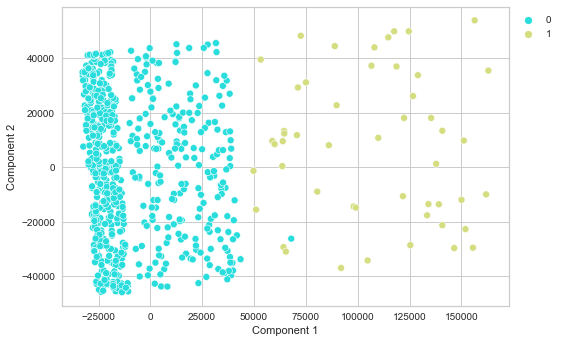

<IPython.core.display.Javascript object>

In [80]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df_HC_PCA["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- Cluster 0 and 2 are the major clusters.
- The rest of the data points seem to be mostly outliers.